# スプラトゥーン２：勝利に貢献する要因の分析

## ライブラリの読み込み

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## データの読み込み

In [2]:
# プレイデータの読み込み
data = pd.read_csv("data/ikaWidgetCSV.csv", dtype=str, low_memory=False)

data.head()

,no,startTime,elapsedTime,win,udemae,udemaeName,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,...,bravo4ShoesSkillID,bravo4ShoesSkillName,bravo4ShoesSub1SkillID,bravo4ShoesSub1SkillName,bravo4ShoesSub2SkillID,bravo4ShoesSub2SkillName,bravo4ShoesSub3SkillID,bravo4ShoesSub3SkillName,Unnamed: 637,Unnamed: 638
0,16146,2021/02/14 17:05:14,312,1,128,X,1,1,0,0,...,5,スペシャル増加量アップ,5,スペシャル増加量アップ,9,スーパージャンプ時間短縮,200,爆風ダメージ軽減・改,NaN,NaN
1,16145,2021/02/14 16:21:14,330,1,128,X,1,1,0,0,...,111,受け身術,9,スーパージャンプ時間短縮,11,相手インク影響軽減,6,スペシャル減少量ダウン,NaN,NaN
2,16144,2021/02/14 16:15:14,317,0,19,S+,0,0,9,0,...,109,ステルスジャンプ,4,イカダッシュ速度アップ,4,イカダッシュ速度アップ,4,イカダッシュ速度アップ,NaN,NaN
3,16143,2021/02/14 16:08:14,303,1,19,S+,0,0,9,0,...,109,ステルスジャンプ,4,イカダッシュ速度アップ,4,イカダッシュ速度アップ,4,イカダッシュ速度アップ,NaN,NaN
4,16142,2021/02/14 16:01:14,320,1,19,S+,0,0,9,0,...,110,対物攻撃力アップ,200,爆風ダメージ軽減・改,9,スーパージャンプ時間短縮,11,相手インク影響軽減,NaN,NaN


In [3]:
weapon = pd.read_csv("data/weapon.csv")

weapon.head()

,WeaponID,WeaponName,射程,攻撃力,連射力,必要ポイント
0,0,ボールドマーカー,1.5,38.0,5.0,160
1,1,ボールドマーカーネオ,1.5,38.0,5.0,170
2,2,ボールドマーカー7,1.5,38.0,5.0,180
3,10,わかばシューター,2.2,28.0,5.0,180
4,11,もみじシューター,2.2,28.0,5.0,160


## データの下準備

In [4]:
# データに含まれる列名を確認
list(data.columns)

['no',
 'startTime',
 'elapsedTime',
 'win',
 'udemae',
 'udemaeName',
 'udemaeIsX',
 'udemaeIsReached',
 'sPlusNumber',
 'xRanking',
 'xPower',
 'myCount',
 'otherCount',
 'winMeter',
 'weaponPaintPoint',
 'leaguePoint',
 'leagueMaxPoint',
 'leagueTeamEstimatePoint',
 'leagueOtherEstimatePoint',
 'gachiEstimatePower',
 'gachiEstimateXPower',
 'fesPoint',
 'fesPower',
 'fesMaxPower',
 'fesTeamEstimatePower',
 'fesOtherEstimatePower',
 'stageID',
 'stageName',
 'gameKey',
 'gameMode',
 'gameModeKey',
 'gameRule',
 'gameRuleKey',
 'gameType',
 'fesID',
 'fesMyTheme',
 'fesMyThemeKey',
 'fesOtherTheme',
 'fesOtherThemeKey',
 'fesMyColorR',
 'fesMyColorG',
 'fesMyColorB',
 'fesOtherColorR',
 'fesOtherColorG',
 'fesOtherColorB',
 'playerName',
 'playerPrincipalID',
 'playerRank',
 'playerUdemae',
 'playerudemaeName',
 'playerSPlusNumber',
 'playerUdemaeIsX',
 'playerUdemaeIsReached',
 'playerIsCrown',
 'playerStarRank',
 'playerKill',
 'playerDeath',
 'playerAssist',
 'playerSpecial',
 'pla

"Unnamed: 637", "Unnamed: 638"という不明の列があるので、確認する

In [5]:
data[["Unnamed: 637", "Unnamed: 638"]].describe()

,Unnamed: 637,Unnamed: 638
count,21,1
unique,11,1
top,ヒト移動速度アップ,スーパージャンプ時間短縮
freq,4,1


In [6]:
data.describe()

,no,startTime,elapsedTime,win,udemae,udemaeName,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,...,bravo4ShoesSkillID,bravo4ShoesSkillName,bravo4ShoesSub1SkillID,bravo4ShoesSub1SkillName,bravo4ShoesSub2SkillID,bravo4ShoesSub2SkillName,bravo4ShoesSub3SkillID,bravo4ShoesSub3SkillName,Unnamed: 637,Unnamed: 638
count,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,...,2486,2486,2486,2486,2486,2486,2486,2486,21,1
unique,2486,2486,301,2,17,8,2,2,10,6,...,29,30,29,28,27,29,29,28,11,1
top,16146,2021/02/14 17:05:14,0,1,0,S+,0,0,0,0,...,4,イカダッシュ速度アップ,4,イカダッシュ速度アップ,4,イカダッシュ速度アップ,4,イカダッシュ速度アップ,ヒト移動速度アップ,スーパージャンプ時間短縮
freq,1,1,591,1320,591,1321,2344,2344,1554,2481,...,403,403,465,465,426,426,382,382,4,1


"Unnamed: 637"列、"Unnamed: 638"列に値を持つ行数が、元のデータの数(2486)に比べて極端に少ない。

これらの列に値をもつデータを調べる

In [7]:
# 全ての列を表示できるように設定
pd.set_option('display.max_columns', None)

# Unnamed: 637 または Unnamed: 638 に NaN ではない値がある行を抽出
filtered_data = data[(data["Unnamed: 637"].notna()) | (data["Unnamed: 638"].notna())]

# 結果を表示
filtered_data

,no,startTime,elapsedTime,win,udemae,udemaeName,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,weaponPaintPoint,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,stageID,stageName,gameKey,gameMode,gameModeKey,gameRule,gameRuleKey,gameType,fesID,fesMyTheme,fesMyThemeKey,fesOtherTheme,fesOtherThemeKey,fesMyColorR,fesMyColorG,fesMyColorB,fesOtherColorR,fesOtherColorG,fesOtherColorB,playerName,playerPrincipalID,playerRank,playerUdemae,playerudemaeName,playerSPlusNumber,playerUdemaeIsX,playerUdemaeIsReached,playerIsCrown,playerStarRank,playerKill,playerDeath,playerAssist,playerSpecial,playerRatio,playerAllKill,playerSortScore,playerPaintPoint,playerFesGrade,playerFesGradeName,playerWeaponID,playerWeaponName,playerWeaponSpecialID,playerWeaponSpecialName,playerWeaponSubID,playerWeaponSubName,playerHeadID,playerHeadName,playerHeadRarity,playerHeadKind,playerHeadBrandID,playerHeadBrandName,playerHeadBrandFrequentSkillID,playerHeadBrandFrequentSkillName,playerHeadSkillID,playerHeadSkillName,playerHeadSub1SkillID,playerHeadSub1SkillName,playerHeadSub2SkillID,playerHeadSub2SkillName,playerHeadSub3SkillID,playerHeadSub3SkillName,playerClothesID,playerClothesName,playerClothesRarity,playerClothesKind,playerClothesBrandID,playerClothesBrandName,playerClothesBrandFrequentSkillID,playerClothesBrandFrequentSkillName,playerClothesSkillID,playerClothesSkillName,playerClothesSub1SkillID,playerClothesSub1SkillName,playerClothesSub2SkillID,playerClothesSub2SkillName,playerClothesSub3SkillID,playerClothesSub3SkillName,playerShoesID,playerShoesName,playerShoesRarity,playerShoesKind,playerShoesBrandID,playerShoesBrandName,playerShoesBrandFrequentSkillID,playerShoesBrandFrequentSkillName,playerShoesSkillID,playerShoesSkillName,playerShoesSub1SkillID,playerShoesSub1SkillName,playerShoesSub2SkillID,playerShoesSub2SkillName,playerShoesSub3SkillID,playerShoesSub3SkillName,alpha1Name,alpha1PrincipalID,alpha1Rank,alpha1Udemae,alpha1udemaeName,alpha1SPlusNumber,alpha1UdemaeIsX,alpha1UdemaeIsReached,alpha1IsCrown,alpha1StarRank,alpha1Kill,alpha1Death,alpha1Assist,alpha1Special,alpha1Ratio,alpha1AllKill,alpha1SortScore,alpha1PaintPoint,alpha1FesGrade,alpha1FesGradeName,alpha1WeaponID,alpha1WeaponName,alpha1WeaponSpecialID,alpha1WeaponSpecialName,alpha1WeaponSubID,alpha1WeaponSubName,alpha1HeadID,alpha1HeadName,alpha1HeadRarity,alpha1HeadKind,alpha1HeadBrandID,alpha1HeadBrandName,alpha1HeadBrandFrequentSkillID,alpha1HeadBrandFrequentSkillName,alpha1HeadSkillID,alpha1HeadSkillName,alpha1HeadSub1SkillID,alpha1HeadSub1SkillName,alpha1HeadSub2SkillID,alpha1HeadSub2SkillName,alpha1HeadSub3SkillID,alpha1HeadSub3SkillName,alpha1ClothesID,alpha1ClothesName,alpha1ClothesRarity,alpha1ClothesKind,alpha1ClothesBrandID,alpha1ClothesBrandName,alpha1ClothesBrandFrequentSkillID,alpha1ClothesBrandFrequentSkillName,alpha1ClothesSkillID,alpha1ClothesSkillName,alpha1ClothesSub1SkillID,alpha1ClothesSub1SkillName,alpha1ClothesSub2SkillID,alpha1ClothesSub2SkillName,alpha1ClothesSub3SkillID,alpha1ClothesSub3SkillName,alpha1ShoesID,alpha1ShoesName,alpha1ShoesRarity,alpha1ShoesKind,alpha1ShoesBrandID,alpha1ShoesBrandName,alpha1ShoesBrandFrequentSkillID,alpha1ShoesBrandFrequentSkillName,alpha1ShoesSkillID,alpha1ShoesSkillName,alpha1ShoesSub1SkillID,alpha1ShoesSub1SkillName,alpha1ShoesSub2SkillID,alpha1ShoesSub2SkillName,alpha1ShoesSub3SkillID,alpha1ShoesSub3SkillName,alpha2Name,alpha2PrincipalID,alpha2Rank,alpha2Udemae,alpha2udemaeName,alpha2SPlusNumber,alpha2UdemaeIsX,alpha2UdemaeIsReached,alpha2IsCrown,alpha2StarRank,alpha2Kill,alpha2Death,alpha2Assist,alpha2Special,alpha2Ratio,alpha2AllKill,alpha2SortScore,alpha2PaintPoint,alpha2FesGrade,alpha2FesGradeName,alpha2WeaponID,alpha2WeaponName,alpha2WeaponSpecialID,alpha2WeaponSpecialName,alpha2WeaponSubID,alpha2WeaponSubName,alpha2HeadID,alpha2HeadName,alpha2HeadRarity,al

In [8]:
# 表示したい列を選択
selected_columns = ["alpha1Name", "alpha1PrincipalID",
                    "alpha2Name", "alpha2PrincipalID",
                    "alpha3Name","alpha3PrincipalID",
                    "bravo1Name", "bravo1PrincipalID",
                    "bravo2Name", "bravo2PrincipalID",
                    "bravo3Name", "bravo3PrincipalID",
                    "bravo4Name", "bravo4PrincipalID"]

# 結果を表示
filtered_data[selected_columns]

,alpha1Name,alpha1PrincipalID,alpha2Name,alpha2PrincipalID,alpha3Name,alpha3PrincipalID,bravo1Name,bravo1PrincipalID,bravo2Name,bravo2PrincipalID,bravo3Name,bravo3PrincipalID,bravo4Name,bravo4PrincipalID
229,"""アイアンマン2 """,ec377872c652460c,"""まほうつかい イカ""",a39c12b6124c81da,"""へたこいか""",f3f8cd8e091a4a45,"""したりくん""",be898af1ee9cef28,"""No","75""",相手インク影響軽減,"""ふ""",イカダッシュ速度アップ,"""エダ"""
241,"""たまきち""",33dc83105b84b91e,"""コクリア""",7b7f7672f55c2bf6,"""めかぶのせんぱんつ""",f85f8d1313681867,"""†aluhu†""",d83b0ee6db176f2b,"""(⌒","_ゝ⌒)""",はてな,"""はなたば""",スペシャル性能アップ,"""ENDer"""
479,"""なめこ""",0ad858f70234749a,"""ゆ""",a34ca6a13d408438,"""ロストシップ""",75446769ec3da2c6,"""humeimei9""",c26cb075ff26b9c5,"""ちょむすけ""",f64e7478465cf57b,"""TI","*KANNA*""",インク効率アップ(メイン),"""なまざかな"""
547,"""M","T """,インク効率アップ(サブ),"""TT's ういづき""",イカダッシュ速度アップ,"""みるくちょこ*ゝ*""",サブ性能アップ,"""タスク""",ヒト移動速度アップ,"""ミスターすまない☆""",インク効率アップ(メイン),"""konoha_3""",イカダッシュ速度アップ,"""りょうすけ"""
808,""" ゆ り * """,d30a1ca6b9a1adf1,"""おならtank""",789a7fc03907b794,"""あおもり たろう""",f702eb43bc19668a,"""Z","Hikoki""",イカダッシュ速度アップ,"""モモペン¾""",イカダッシュ速度アップ,"""だいこん""",インク効率アップ(メイン),"""yuki*くーげる*"""
904,"""Minomushi""",f6f9589cfdfbdcd9,"""~`;:""'",".*/""",インク回復力アップ,"""ドスコイのももにく""",はてな,"""よ～いドン！！""",サブ性能アップ,"""よろずや""",爆風ダメージ軽減・改,"""こふゆるり""",メイン性能アップ,"""みりょー"""
958,"""muu""",7fc845424a757286,"""さとう""",05568be377dd6d09,"""BELLE""",dad3b5af6d2f8c18,"""Ms","Masako""",はてな,"""シフォン""",インク回復力アップ,"""オーノ""",スペシャル減少量ダウン,"""ひろむくん"""
959,"""Ms","Masako""",はてな,"""た""",イカダッシュ速度アップ,"""ツバメ""",スーパージャンプ時間短縮,"""muu""",はてな,"""さとう""",インク効率アップ(メイン),"""こころ""",スペシャル減少量ダウン,"""PILOT"""
960,"""た""",1ef799316a28d744,"""ぬおおおおおおおおお""",3a742c1bc0854ff4,"""こころ""",4ced4e952eb49894,"""Ms","Masako""",はてな,"""muu""",はてな,"""ちさみけ&かずきじ""",インク効率アップ(メイン),"""さとう"""
961,"""た""",1ef799316a28d744,"""おすし""",80af563c80dab958,"""さとう""",05568be377dd6d09,"""Ms","Masako""",はてな,"""ミシル""",ヒト移動速度アップ,"""muu""",はてな,"""ちさみけ&かずきじ"""


### 列のずれを修正

一部の行で**カラムが本来の構造からずれて記録されている**ことが確認された。
具体的には、プレイヤーの PrincipalID（プレイヤー識別ID）の列に、本来 Name（プレイヤー名）が入ってしまい、それ以降のカラムがすべて右にずれてしまっている。

**原因**
- PrincipalID には ランダムな英数字の識別ID が入るはずだが、その前の Name 列に'"'が含まれるなどの理由で、一部の行では PrincipalID の代わりにプレイヤー名が記録されている
- それにより、PrincipalID 列以降の値がすべて1つずつ右にずれてしまっている

**対処方法**
1. PrincipalID の値をチェックし、ランダムな英数字の形式でない場合は Name の値と統合する
2. PrincipalID を None にした後、その行のすべての値を左詰めする

In [9]:
# filtered_data のインデックスを取得
filtered_index = filtered_data.index

# ランダムな英数字（PrincipalID）のパターンを作成
id_pattern = re.compile(r"^[a-f0-9]{8,}$", re.IGNORECASE)

# PrincipalID列と、Name列の列名リストを作成
id_columns = ["playerPrincipalID", "alpha1PrincipalID", "alpha2PrincipalID", "alpha3PrincipalID",
              "bravo1PrincipalID", "bravo2PrincipalID", "bravo3PrincipalID", "bravo4PrincipalID"]

name_columns = ["playerName", "alpha1Name", "alpha2Name", "alpha3Name",
                "bravo1Name", "bravo2Name", "bravo3Name", "bravo4Name"]

In [10]:
def fix_principal_id(row):
    updated_row = row.copy()  # 元の行をコピー

    # IDをNameへ統合（プレイヤーごとに処理し、その都度左詰め）
    for player_type in ["player", "alpha1", "alpha2", "alpha3", "bravo1", "bravo2", "bravo3", "bravo4"]:
        id_col = player_type + "PrincipalID"
        name_col = player_type + "Name"

        id_value = str(updated_row[id_col]).strip()
        name_value = str(updated_row[name_col]).strip()

        # **IDがランダムな英数字でない場合は Name に統合**
        if not id_pattern.match(id_value):
            updated_row[name_col] = name_value + id_value  # `Name` に結合
            updated_row[id_col] = None  # `ID` を空欄にする

            # None以降の列を左詰め処理
            temp_values = [x for x in updated_row if x is not None]  # Noneを除く
            temp_values += [""] * (len(updated_row) - len(temp_values))  # 空白で埋める
            updated_row[:] = temp_values  # 値の並びだけ更新（カラムは維持）
            
    return updated_row


# データフレームに適用
cleaned_data = filtered_data.apply(fix_principal_id, axis=1)

# 結果を表示
cleaned_data.head()

,no,startTime,elapsedTime,win,udemae,udemaeName,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,weaponPaintPoint,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,stageID,stageName,gameKey,gameMode,gameModeKey,gameRule,gameRuleKey,gameType,fesID,fesMyTheme,fesMyThemeKey,fesOtherTheme,fesOtherThemeKey,fesMyColorR,fesMyColorG,fesMyColorB,fesOtherColorR,fesOtherColorG,fesOtherColorB,playerName,playerPrincipalID,playerRank,playerUdemae,playerudemaeName,playerSPlusNumber,playerUdemaeIsX,playerUdemaeIsReached,playerIsCrown,playerStarRank,playerKill,playerDeath,playerAssist,playerSpecial,playerRatio,playerAllKill,playerSortScore,playerPaintPoint,playerFesGrade,playerFesGradeName,playerWeaponID,playerWeaponName,playerWeaponSpecialID,playerWeaponSpecialName,playerWeaponSubID,playerWeaponSubName,playerHeadID,playerHeadName,playerHeadRarity,playerHeadKind,playerHeadBrandID,playerHeadBrandName,playerHeadBrandFrequentSkillID,playerHeadBrandFrequentSkillName,playerHeadSkillID,playerHeadSkillName,playerHeadSub1SkillID,playerHeadSub1SkillName,playerHeadSub2SkillID,playerHeadSub2SkillName,playerHeadSub3SkillID,playerHeadSub3SkillName,playerClothesID,playerClothesName,playerClothesRarity,playerClothesKind,playerClothesBrandID,playerClothesBrandName,playerClothesBrandFrequentSkillID,playerClothesBrandFrequentSkillName,playerClothesSkillID,playerClothesSkillName,playerClothesSub1SkillID,playerClothesSub1SkillName,playerClothesSub2SkillID,playerClothesSub2SkillName,playerClothesSub3SkillID,playerClothesSub3SkillName,playerShoesID,playerShoesName,playerShoesRarity,playerShoesKind,playerShoesBrandID,playerShoesBrandName,playerShoesBrandFrequentSkillID,playerShoesBrandFrequentSkillName,playerShoesSkillID,playerShoesSkillName,playerShoesSub1SkillID,playerShoesSub1SkillName,playerShoesSub2SkillID,playerShoesSub2SkillName,playerShoesSub3SkillID,playerShoesSub3SkillName,alpha1Name,alpha1PrincipalID,alpha1Rank,alpha1Udemae,alpha1udemaeName,alpha1SPlusNumber,alpha1UdemaeIsX,alpha1UdemaeIsReached,alpha1IsCrown,alpha1StarRank,alpha1Kill,alpha1Death,alpha1Assist,alpha1Special,alpha1Ratio,alpha1AllKill,alpha1SortScore,alpha1PaintPoint,alpha1FesGrade,alpha1FesGradeName,alpha1WeaponID,alpha1WeaponName,alpha1WeaponSpecialID,alpha1WeaponSpecialName,alpha1WeaponSubID,alpha1WeaponSubName,alpha1HeadID,alpha1HeadName,alpha1HeadRarity,alpha1HeadKind,alpha1HeadBrandID,alpha1HeadBrandName,alpha1HeadBrandFrequentSkillID,alpha1HeadBrandFrequentSkillName,alpha1HeadSkillID,alpha1HeadSkillName,alpha1HeadSub1SkillID,alpha1HeadSub1SkillName,alpha1HeadSub2SkillID,alpha1HeadSub2SkillName,alpha1HeadSub3SkillID,alpha1HeadSub3SkillName,alpha1ClothesID,alpha1ClothesName,alpha1ClothesRarity,alpha1ClothesKind,alpha1ClothesBrandID,alpha1ClothesBrandName,alpha1ClothesBrandFrequentSkillID,alpha1ClothesBrandFrequentSkillName,alpha1ClothesSkillID,alpha1ClothesSkillName,alpha1ClothesSub1SkillID,alpha1ClothesSub1SkillName,alpha1ClothesSub2SkillID,alpha1ClothesSub2SkillName,alpha1ClothesSub3SkillID,alpha1ClothesSub3SkillName,alpha1ShoesID,alpha1ShoesName,alpha1ShoesRarity,alpha1ShoesKind,alpha1ShoesBrandID,alpha1ShoesBrandName,alpha1ShoesBrandFrequentSkillID,alpha1ShoesBrandFrequentSkillName,alpha1ShoesSkillID,alpha1ShoesSkillName,alpha1ShoesSub1SkillID,alpha1ShoesSub1SkillName,alpha1ShoesSub2SkillID,alpha1ShoesSub2SkillName,alpha1ShoesSub3SkillID,alpha1ShoesSub3SkillName,alpha2Name,alpha2PrincipalID,alpha2Rank,alpha2Udemae,alpha2udemaeName,alpha2SPlusNumber,alpha2UdemaeIsX,alpha2UdemaeIsReached,alpha2IsCrown,alpha2StarRank,alpha2Kill,alpha2Death,alpha2Assist,alpha2Special,alpha2Ratio,alpha2AllKill,alpha2SortScore,alpha2PaintPoint,alpha2FesGrade,alpha2FesGradeName,alpha2WeaponID,alpha2WeaponName,alpha2WeaponSpecialID,alpha2WeaponSpecialName,alpha2WeaponSubID,alpha2WeaponSubName,alpha2HeadID,alpha2HeadName,alpha2HeadRarity,al

In [11]:
cleaned_data[selected_columns]

,alpha1Name,alpha1PrincipalID,alpha2Name,alpha2PrincipalID,alpha3Name,alpha3PrincipalID,bravo1Name,bravo1PrincipalID,bravo2Name,bravo2PrincipalID,bravo3Name,bravo3PrincipalID,bravo4Name,bravo4PrincipalID
229,"""アイアンマン2 """,ec377872c652460c,"""まほうつかい イカ""",a39c12b6124c81da,"""へたこいか""",f3f8cd8e091a4a45,"""したりくん""",be898af1ee9cef28,"""No75""",87e802a4b4e9ca2d,"""ふ""",f6d8789a8c61b067,"""エダ""",d9679d907fad3efa
241,"""たまきち""",33dc83105b84b91e,"""コクリア""",7b7f7672f55c2bf6,"""めかぶのせんぱんつ""",f85f8d1313681867,"""†aluhu†""",d83b0ee6db176f2b,"""(⌒_ゝ⌒)""",24982de78f512cbc,"""はなたば""",e5d87344253b6e55,"""ENDer""",0832a4ae65c6393e
479,"""なめこ""",0ad858f70234749a,"""ゆ""",a34ca6a13d408438,"""ロストシップ""",75446769ec3da2c6,"""humeimei9""",c26cb075ff26b9c5,"""ちょむすけ""",f64e7478465cf57b,"""TI*KANNA*""",0e40e4ebb900603c,"""なまざかな""",dca92b6a51c6928b
547,"""MT """,d151242d38f7e3bd,"""TT's ういづき""",1924d6017041522c,"""みるくちょこ*ゝ*""",9b8753fb4bcf8d9b,"""タスク""",debcf290a0e82ba2,"""ミスターすまない☆""",c6b35a60ef28f59a,"""konoha_3""",fae7757da64ee0f9,"""りょうすけ""",fec33b1080a69684
808,""" ゆ り * """,d30a1ca6b9a1adf1,"""おならtank""",789a7fc03907b794,"""あおもり たろう""",f702eb43bc19668a,"""ZHikoki""",0b8c8332b12c7b1e,"""モモペン¾""",1adc4faa2080b155,"""だいこん""",e3d161405de572b1,"""yuki*くーげる*""",9e3d5d25bf5a5545
904,"""Minomushi""",f6f9589cfdfbdcd9,"""~`;:""'.*/""",ad83b711dfb11367,"""ドスコイのももにく""",21bc4e6e05aecd99,"""よ～いドン！！""",e260a2f5e894aff9,"""よろずや""",3d5de5876a978976,"""こふゆるり""",832729beeac22eda,"""みりょー""",65907ec84bda8c4e
958,"""muu""",7fc845424a757286,"""さとう""",05568be377dd6d09,"""BELLE""",dad3b5af6d2f8c18,"""MsMasako""",ef5aedbbfa2b9332,"""シフォン""",5bc5fd186fbd957e,"""オーノ""",0cfa52d8b786832f,"""ひろむくん""",2dc2479c9be80f52
959,"""MsMasako""",ef5aedbbfa2b9332,"""た""",1ef799316a28d744,"""ツバメ""",11b160772e8206c4,"""muu""",7fc845424a757286,"""さとう""",05568be377dd6d09,"""こころ""",4ced4e952eb49894,"""PILOT""",e44846b8ce8b7cfd
960,"""た""",1ef799316a28d744,"""ぬおおおおおおおおお""",3a742c1bc0854ff4,"""こころ""",4ced4e952eb49894,"""MsMasako""",ef5aedbbfa2b9332,"""muu""",7fc845424a757286,"""ちさみけ&かずきじ""",6870a6429be184b0,"""さとう""",05568be377dd6d09
961,"""た""",1ef799316a28d744,"""おすし""",80af563c80dab958,"""さとう""",05568be377dd6d09,"""MsMasako""",ef5aedbbfa2b9332,"""ミシル""",97ac65c9ef5d2bc2,"""muu""",7fc845424a757286,"""ちさみけ&かずきじ""",6870a6429be184b0


In [12]:
# data の間違いがあったデータを cleaned_data に置き換え
data.loc[filtered_index] = cleaned_data

# 修正後の data を確認
print(data.shape)

(2486, 639)


In [13]:
# 処理できてない行を一旦手動で削除

data = data[data["no"] != "9880"]

In [14]:
data.head()

,no,startTime,elapsedTime,win,udemae,udemaeName,udemaeIsX,udemaeIsReached,sPlusNumber,xRanking,xPower,myCount,otherCount,winMeter,weaponPaintPoint,leaguePoint,leagueMaxPoint,leagueTeamEstimatePoint,leagueOtherEstimatePoint,gachiEstimatePower,gachiEstimateXPower,fesPoint,fesPower,fesMaxPower,fesTeamEstimatePower,fesOtherEstimatePower,stageID,stageName,gameKey,gameMode,gameModeKey,gameRule,gameRuleKey,gameType,fesID,fesMyTheme,fesMyThemeKey,fesOtherTheme,fesOtherThemeKey,fesMyColorR,fesMyColorG,fesMyColorB,fesOtherColorR,fesOtherColorG,fesOtherColorB,playerName,playerPrincipalID,playerRank,playerUdemae,playerudemaeName,playerSPlusNumber,playerUdemaeIsX,playerUdemaeIsReached,playerIsCrown,playerStarRank,playerKill,playerDeath,playerAssist,playerSpecial,playerRatio,playerAllKill,playerSortScore,playerPaintPoint,playerFesGrade,playerFesGradeName,playerWeaponID,playerWeaponName,playerWeaponSpecialID,playerWeaponSpecialName,playerWeaponSubID,playerWeaponSubName,playerHeadID,playerHeadName,playerHeadRarity,playerHeadKind,playerHeadBrandID,playerHeadBrandName,playerHeadBrandFrequentSkillID,playerHeadBrandFrequentSkillName,playerHeadSkillID,playerHeadSkillName,playerHeadSub1SkillID,playerHeadSub1SkillName,playerHeadSub2SkillID,playerHeadSub2SkillName,playerHeadSub3SkillID,playerHeadSub3SkillName,playerClothesID,playerClothesName,playerClothesRarity,playerClothesKind,playerClothesBrandID,playerClothesBrandName,playerClothesBrandFrequentSkillID,playerClothesBrandFrequentSkillName,playerClothesSkillID,playerClothesSkillName,playerClothesSub1SkillID,playerClothesSub1SkillName,playerClothesSub2SkillID,playerClothesSub2SkillName,playerClothesSub3SkillID,playerClothesSub3SkillName,playerShoesID,playerShoesName,playerShoesRarity,playerShoesKind,playerShoesBrandID,playerShoesBrandName,playerShoesBrandFrequentSkillID,playerShoesBrandFrequentSkillName,playerShoesSkillID,playerShoesSkillName,playerShoesSub1SkillID,playerShoesSub1SkillName,playerShoesSub2SkillID,playerShoesSub2SkillName,playerShoesSub3SkillID,playerShoesSub3SkillName,alpha1Name,alpha1PrincipalID,alpha1Rank,alpha1Udemae,alpha1udemaeName,alpha1SPlusNumber,alpha1UdemaeIsX,alpha1UdemaeIsReached,alpha1IsCrown,alpha1StarRank,alpha1Kill,alpha1Death,alpha1Assist,alpha1Special,alpha1Ratio,alpha1AllKill,alpha1SortScore,alpha1PaintPoint,alpha1FesGrade,alpha1FesGradeName,alpha1WeaponID,alpha1WeaponName,alpha1WeaponSpecialID,alpha1WeaponSpecialName,alpha1WeaponSubID,alpha1WeaponSubName,alpha1HeadID,alpha1HeadName,alpha1HeadRarity,alpha1HeadKind,alpha1HeadBrandID,alpha1HeadBrandName,alpha1HeadBrandFrequentSkillID,alpha1HeadBrandFrequentSkillName,alpha1HeadSkillID,alpha1HeadSkillName,alpha1HeadSub1SkillID,alpha1HeadSub1SkillName,alpha1HeadSub2SkillID,alpha1HeadSub2SkillName,alpha1HeadSub3SkillID,alpha1HeadSub3SkillName,alpha1ClothesID,alpha1ClothesName,alpha1ClothesRarity,alpha1ClothesKind,alpha1ClothesBrandID,alpha1ClothesBrandName,alpha1ClothesBrandFrequentSkillID,alpha1ClothesBrandFrequentSkillName,alpha1ClothesSkillID,alpha1ClothesSkillName,alpha1ClothesSub1SkillID,alpha1ClothesSub1SkillName,alpha1ClothesSub2SkillID,alpha1ClothesSub2SkillName,alpha1ClothesSub3SkillID,alpha1ClothesSub3SkillName,alpha1ShoesID,alpha1ShoesName,alpha1ShoesRarity,alpha1ShoesKind,alpha1ShoesBrandID,alpha1ShoesBrandName,alpha1ShoesBrandFrequentSkillID,alpha1ShoesBrandFrequentSkillName,alpha1ShoesSkillID,alpha1ShoesSkillName,alpha1ShoesSub1SkillID,alpha1ShoesSub1SkillName,alpha1ShoesSub2SkillID,alpha1ShoesSub2SkillName,alpha1ShoesSub3SkillID,alpha1ShoesSub3SkillName,alpha2Name,alpha2PrincipalID,alpha2Rank,alpha2Udemae,alpha2udemaeName,alpha2SPlusNumber,alpha2UdemaeIsX,alpha2UdemaeIsReached,alpha2IsCrown,alpha2StarRank,alpha2Kill,alpha2Death,alpha2Assist,alpha2Special,alpha2Ratio,alpha2AllKill,alpha2SortScore,alpha2PaintPoint,alpha2FesGrade,alpha2FesGradeName,alpha2WeaponID,alpha2WeaponName,alpha2WeaponSpecialID,alpha2WeaponSpecialName,alpha2WeaponSubID,alpha2WeaponSubName,alpha2HeadID,alpha2HeadName,alpha2HeadRarity,al

### 不要な列の削除

In [15]:
# 使わないカラムを削除（例: 試合情報、武器・ギアデータ）
drop_columns = [
    'startTime', 'elapsedTime', 'udemae', 'udemaeIsX', 'udemaeIsReached', 'sPlusNumber',
    'xRanking', 'xPower', 'myCount', 'otherCount', 'winMeter', 'weaponPaintPoint', 'leaguePoint',
    'leagueMaxPoint', 'leagueTeamEstimatePoint', 'leagueOtherEstimatePoint', 'gachiEstimatePower',
    'gachiEstimateXPower', 'fesPoint', 'fesPower', 'fesMaxPower', 'fesTeamEstimatePower', 'fesOtherEstimatePower',
    'stageID', 'gameKey', 'gameMode', 'gameModeKey', 'gameRuleKey', 'gameType', 'fesID',
    'fesMyTheme', 'fesMyThemeKey', 'fesOtherTheme', 'fesOtherThemeKey', 'fesMyColorR', 'fesMyColorG',
    'fesMyColorB', 'fesOtherColorR', 'fesOtherColorG', 'fesOtherColorB', 
    'Name', 'udemaeName', 'SPlusNumber', 'UdemaeIsX', 'UdemaeIsReached',
    'IsCrown', 'AllKill', 'SortScore',
    'FesGrade', 'FesGradeName', 'WeaponName', 'WeaponSpecialID', 'WeaponSpecialName',
    'WeaponSubID', 'WeaponSubName', 'HeadID', 'HeadName', 'HeadRarity', 'HeadKind', 'HeadBrandID',
    'HeadBrandName', 'HeadBrandFrequentSkillID', 'HeadBrandFrequentSkillName', 'HeadSkillID', 'HeadSkillName',
    'HeadSub1SkillID', 'HeadSub1SkillName', 'HeadSub2SkillID', 'HeadSub2SkillName', 'HeadSub3SkillID', 'HeadSub3SkillName',
    'ClothesID', 'ClothesName', 'ClothesRarity', 'ClothesKind', 'ClothesBrandID', 'ClothesBrandName',
    'ClothesBrandFrequentSkillID', 'ClothesBrandFrequentSkillName', 'ClothesSkillID', 'ClothesSkillName',
    'ClothesSub1SkillID', 'ClothesSub1SkillName', 'ClothesSub2SkillID', 'ClothesSub2SkillName', 'ClothesSub3SkillID', 'ClothesSub3SkillName',
    'ShoesID', 'ShoesName', 'ShoesRarity', 'ShoesKind', 'ShoesBrandID', 'ShoesBrandName', 'ShoesBrandFrequentSkillID',
    'ShoesBrandFrequentSkillName', 'ShoesSkillID', 'ShoesSkillName', 'ShoesSub1SkillID', 'ShoesSub1SkillName',
    'ShoesSub2SkillID', 'ShoesSub2SkillName', 'ShoesSub3SkillID', 'ShoesSub3SkillName',
    'Unnamed: 637', 'Unnamed: 638', "PrincipalID", "Udemae"
]

# drop_columns に含まれる文字列を含むカラムを削除
columns_to_drop = [col for col in data.columns if any(drop in col for drop in drop_columns)]
data_dropped = data.drop(columns=columns_to_drop)

# 削除後のカラムを確認
print(list(data_dropped.columns))

['no', 'win', 'gameRule', 'playerRank', 'playerStarRank', 'playerKill', 'playerDeath', 'playerAssist', 'playerSpecial', 'playerRatio', 'playerPaintPoint', 'playerWeaponID', 'alpha1Rank', 'alpha1StarRank', 'alpha1Kill', 'alpha1Death', 'alpha1Assist', 'alpha1Special', 'alpha1Ratio', 'alpha1PaintPoint', 'alpha1WeaponID', 'alpha2Rank', 'alpha2StarRank', 'alpha2Kill', 'alpha2Death', 'alpha2Assist', 'alpha2Special', 'alpha2Ratio', 'alpha2PaintPoint', 'alpha2WeaponID', 'alpha3Rank', 'alpha3StarRank', 'alpha3Kill', 'alpha3Death', 'alpha3Assist', 'alpha3Special', 'alpha3Ratio', 'alpha3PaintPoint', 'alpha3WeaponID', 'bravo1Rank', 'bravo1StarRank', 'bravo1Kill', 'bravo1Death', 'bravo1Assist', 'bravo1Special', 'bravo1Ratio', 'bravo1PaintPoint', 'bravo1WeaponID', 'bravo2Rank', 'bravo2StarRank', 'bravo2Kill', 'bravo2Death', 'bravo2Assist', 'bravo2Special', 'bravo2Ratio', 'bravo2PaintPoint', 'bravo2WeaponID', 'bravo3Rank', 'bravo3StarRank', 'bravo3Kill', 'bravo3Death', 'bravo3Assist', 'bravo3Special'

### 縦長データに整形

**データの規則**

このデータセットは、**1試合ごとの情報が1行にまとまっている**形式。  
各プレイヤーの情報は、データを記録したプレイヤー（プレイヤーA）を基準に、以下のような命名規則で管理されている。

- **試合全体のデータ**（`no ~ fesOtherColorB`）：試合のルールやステージ情報
- **プレイヤーA**（`player`）：データを取得した本人
- **味方チーム**（`alpha1` ~ `alpha3`）
- **敵チーム**（`bravo1` ~ `bravo4`）

1行に **8人のプレイヤーのデータ** が含まれており、それぞれの列に武器、キル数、デス数などの情報が格納されている。

以下で、1行に1試合1プレイヤーの行をもつ形式に変換する。

In [16]:
# 列名をアンダースコアで区切る形式に変換
data_renamed = data_dropped.rename(columns=lambda x: x.replace("player", "player_")
                                    .replace("alpha1", "alpha1_")
                                    .replace("alpha2", "alpha2_")
                                    .replace("alpha3", "alpha3_")
                                    .replace("bravo1", "bravo1_")
                                    .replace("bravo2", "bravo2_")
                                    .replace("bravo3", "bravo3_")
                                    .replace("bravo4", "bravo4_"))

# 統一したい列名に共通して含まれる単語リスト
common_columns = ["Rank", "StarRank", "Kill", "Death", "Assist", "Special", "PaintPoint", "Ratio", "WeaponID"]

# 縦長データに変換
id_vars = ["no", "win", "gameRule"]
value_vars = [col for col in data_renamed.columns if any(stub in col for stub in common_columns)]

melted_data = data_renamed.melt(id_vars=id_vars, value_vars=value_vars, var_name="player_stat", value_name="value")

# player_stat を player_type と stat に分割
melted_data[['player_type', 'stat']] = melted_data['player_stat'].str.extract(r'^(player|alpha\d|bravo\d)_(.+)$')

# データをpivot
long_data = melted_data.pivot(index=['no', 'win', 'gameRule', 'player_type'], columns='stat', values='value').reset_index()

# 結果を確認
long_data.head(20)

stat,no,win,gameRule,player_type,Assist,Death,Kill,PaintPoint,Rank,Ratio,Special,StarRank,WeaponID
0,10075,0,ガチヤグラ,alpha1,2,11,3,905,28,272,2,1,3022
1,10075,0,ガチヤグラ,alpha2,2,7,8,912,22,1142,3,0,1010
2,10075,0,ガチヤグラ,alpha3,2,10,6,1063,34,600,3,2,60
3,10075,0,ガチヤグラ,bravo1,6,3,7,1173,1,2333,6,3,51
4,10075,0,ガチヤグラ,bravo2,0,5,8,888,75,1600,2,1,242
5,10075,0,ガチヤグラ,bravo3,4,9,10,736,57,1111,2,0,5012
6,10075,0,ガチヤグラ,bravo4,1,4,9,1206,60,2250,4,1,4015
7,10075,0,ガチヤグラ,player,2,7,3,1097,61,428,2,1,5031
8,10076,0,ガチヤグラ,alpha1,2,5,9,1340,34,1800,5,1,72
9,10076,0,ガチヤグラ,alpha2,2,11,10,644,57,909,1,0,5012


勝利に貢献する一般的な要因を知ることが目的のため、player_typeがplayerのデータを削除し偏りをなくす。

In [17]:
long_data_dropped = long_data[long_data["player_type"] != "player"]

long_data_dropped.head(10)

stat,no,win,gameRule,player_type,Assist,Death,Kill,PaintPoint,Rank,Ratio,Special,StarRank,WeaponID
0,10075,0,ガチヤグラ,alpha1,2,11,3,905,28,272,2,1,3022
1,10075,0,ガチヤグラ,alpha2,2,7,8,912,22,1142,3,0,1010
2,10075,0,ガチヤグラ,alpha3,2,10,6,1063,34,600,3,2,60
3,10075,0,ガチヤグラ,bravo1,6,3,7,1173,1,2333,6,3,51
4,10075,0,ガチヤグラ,bravo2,0,5,8,888,75,1600,2,1,242
5,10075,0,ガチヤグラ,bravo3,4,9,10,736,57,1111,2,0,5012
6,10075,0,ガチヤグラ,bravo4,1,4,9,1206,60,2250,4,1,4015
8,10076,0,ガチヤグラ,alpha1,2,5,9,1340,34,1800,5,1,72
9,10076,0,ガチヤグラ,alpha2,2,11,10,644,57,909,1,0,5012
10,10076,0,ガチヤグラ,alpha3,0,8,7,862,95,875,2,0,3005


### 不要な行の削除

In [18]:
# 数値でないデータを含む行を特定する関数
def is_not_numeric(x):
    if pd.isna(x):  # NaNなら数値ではないと判断
        return True
    try:
        float(x)  # 数値に変換できるか試す
        return False  # 変換できたら数値
    except ValueError:
        return True  # 変換できなかったら数値でない

# 数値が入っている列名リスト
numeric_columns = ["win", "Assist", "Death", "Kill", "PaintPoint", "Ratio", "Rank", "StarRank", "Special","WeaponID"]

# 各列が数値でないかどうかを判定
non_numeric = long_data_dropped[numeric_columns].applymap(is_not_numeric)

# 数値でないデータを含む行を抽出
non_numeric_rows = long_data_dropped[non_numeric.any(axis=1)]

# 結果を表示
non_numeric_rows.head()

stat,no,win,gameRule,player_type,Assist,Death,Kill,PaintPoint,Rank,Ratio,Special,StarRank,WeaponID
586,10158,0,ガチホコバトル,alpha3,,,,,,,,,
590,10158,0,ガチホコバトル,bravo4,,,,,,,,,
634,10164,1,ガチアサリ,alpha3,,,,,,,,,
638,10164,1,ガチアサリ,bravo4,,,,,,,,,
642,10165,0,ガチホコバトル,alpha3,,,,,,,,,


In [19]:
# non_numeric_rows のインデックスを取得して long_data_dropped から削除
long_data_cleaned = long_data_dropped.drop(non_numeric_rows.index)

# 結果を確認
print("元のデータサイズ:", long_data_dropped.shape)  # 元のデータの形
print("数値でないデータの数:", non_numeric_rows.shape)  # 間違ったデータの形
print("クリーンデータサイズ:", long_data_cleaned.shape)  # 現在のデータの形

元のデータサイズ: (17395, 13)
数値でないデータの数: (294, 13)
クリーンデータサイズ: (17101, 13)


### データ型の変換

In [20]:
# データ型を数値型に変換し、変換できない値は NaN にする
long_data_cleaned[numeric_columns] = long_data_cleaned[numeric_columns].apply(pd.to_numeric, errors="coerce")

# NaNがないことを確認
print("NaNの数:")
print(long_data_cleaned.isnull().sum())

NaNの数:
stat
no             0
win            0
gameRule       0
player_type    0
Assist         0
Death          0
Kill           0
PaintPoint     0
Rank           0
Ratio          0
Special        0
StarRank       0
WeaponID       0
dtype: int64


### 必要な列の追加

データ分析を行うために、以下のような新しい列を追加する。

1. Rank_calculated（計算されたランク）

    - Rank と starRank を組み合わせた新しい指標。
    - Rank + (starRank × 100) の計算式で作成。

2. 武器に関する情報の追加

    - WeaponID をキーとして、**武器情報（weapon.csv）**と統合。
    - w_range（射程）、w_damage（攻撃力）、w_rapid（連射力）、w_special（スペシャル発動のための必要ポイント）を追加。

In [21]:
# データをコピー
long_data_added = long_data_cleaned.copy()

# スターランクを考慮したランクを計算して新しい列を追加
long_data_added["Rank_calculated"] = long_data_added["Rank"] + (long_data_added["StarRank"] * 100)

# 結果を確認
long_data_added.head()

stat,no,win,gameRule,player_type,Assist,Death,Kill,PaintPoint,Rank,Ratio,Special,StarRank,WeaponID,Rank_calculated
0,10075,0,ガチヤグラ,alpha1,2,11,3,905,28,272,2,1,3022,128
1,10075,0,ガチヤグラ,alpha2,2,7,8,912,22,1142,3,0,1010,22
2,10075,0,ガチヤグラ,alpha3,2,10,6,1063,34,600,3,2,60,234
3,10075,0,ガチヤグラ,bravo1,6,3,7,1173,1,2333,6,3,51,301
4,10075,0,ガチヤグラ,bravo2,0,5,8,888,75,1600,2,1,242,175


In [22]:
# 武器データをマージ（WeaponIDをキーとして結合）
long_data_merged = pd.merge(long_data_added, weapon, on="WeaponID", how="left")

# カラム名を変更
long_data_merged = long_data_merged.rename(columns={"射程": "w_range", "攻撃力": "w_damage", "連射力": "w_rapid", "必要ポイント": "w_special"})

# 結果を確認
long_data_merged.head()

,no,win,gameRule,player_type,Assist,Death,Kill,PaintPoint,Rank,Ratio,Special,StarRank,WeaponID,Rank_calculated,WeaponName,w_range,w_damage,w_rapid,w_special
0,10075,0,ガチヤグラ,alpha1,2,11,3,905,28,272,2,1,3022,128,スクリュースロッシャーベッチュー,3.0,76.0,33.0,190
1,10075,0,ガチヤグラ,alpha2,2,7,8,912,22,1142,3,0,1010,22,スプラローラー,1.6,150.0,56.0,170
2,10075,0,ガチヤグラ,alpha3,2,10,6,1063,34,600,3,2,60,234,N-ZAP85,2.4,28.0,5.0,200
3,10075,0,ガチヤグラ,bravo1,6,3,7,1173,1,2333,6,3,51,301,.52ガロンデコ,2.6,52.0,9.0,190
4,10075,0,ガチヤグラ,bravo2,0,5,8,888,75,1600,2,1,242,175,ラピッドブラスターベッチュー,3.1,85.0,35.0,200


### ゲームルールごとにデータを分割

In [23]:
# gameRule のユニークな値を確認
print(long_data_merged["gameRule"].unique())

[' ガチヤグラ' ' ガチアサリ' ' ガチエリア' ' ナワバリバトル' ' ガチホコバトル']


In [24]:
gachi_area = long_data_merged[long_data_merged["gameRule"].str.strip() == "ガチエリア"]
gachi_hoko = long_data_merged[long_data_merged["gameRule"].str.strip() == "ガチホコバトル"]
gachi_asari = long_data_merged[long_data_merged["gameRule"].str.strip() == "ガチアサリ"]

print(gachi_area.head())

        no  win gameRule player_type  Assist  Death  Kill  PaintPoint  Rank  \
154  10097    1    ガチエリア      alpha1       4      8     7        1057    64   
155  10097    1    ガチエリア      alpha2       3      5     6        1560    46   
156  10097    1    ガチエリア      alpha3       2      5     8        1832    74   
157  10097    1    ガチエリア      bravo1       1      3     4        1585    75   
158  10097    1    ガチエリア      bravo2       1     11     2        1040    57   

     Ratio  Special  StarRank  WeaponID  Rank_calculated      WeaponName  \
154    875        2         1      3002              164   バケットスロッシャーソーダ   
155   1200        5         1        32              146        プロモデラーPG   
156   1600       11         1         1              174      ボールドマーカーネオ   
157   1333        5         0      5031               75   デュアルスイーパーカスタム   
158    181        2         1      1100              157             パブロ   

     w_range  w_damage  w_rapid  w_special  
154      3.1      50.0 

## プレイデータの分析

In [114]:
# ゲームモードごとにデータ分布を確認する関数
def check_distribution(game_mode, mode_name):
    # 説明・目的変数の設定
    X = game_mode[features]
    y = game_mode["win"]

    # データ分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # クラス分布の確認
    print("Train class distribution:\n", y_train.value_counts())
    print("Test class distribution:\n", y_test.value_counts())
    
    return X_train, X_test, y_train, y_test

In [91]:
# ゲームモードごとに相関関係と特徴量の分布を確認する関数
def check_correlation_distribution(X_train, mode_name):
    # ヒートマップ（相関関係）
    plt.figure(figsize=(10, 8))
    sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Feature Correlation Heatmap ({mode_name})")
    plt.show()

    # ヒストグラム（特徴量の分布）
    X_train.hist(figsize=(10, 8), bins=30)
    plt.suptitle(f"Feature Distribution ({mode_name})")
    plt.show()

In [92]:
# ゲームモードごとにロジスティック回帰分析を行い　モデル評価を行う関数
def logistic_regression(X_train, X_test, y_train, y_test, mode_name):
    # 特徴量のスケーリング
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ロジスティック回帰モデルの学習
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # 予測＆評価
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for {mode_name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # 係数の確認（特徴量の影響度）
    coef_df = pd.DataFrame({"Feature": features, "Coefficient": model.coef_[0]})
    coef_df = coef_df.sort_values(by="Coefficient", ascending=False)
    print("\nFeature Coefficients:\n", coef_df)

### ガチエリア

In [93]:
# 説明・目的変数の設定
features = ["Rank_calculated", "Assist", "Death", "Kill", "PaintPoint",
            "Ratio", "Special", "w_range", "w_damage", "w_rapid", "w_special"]

In [116]:
# ガチエリアのデータ分布を確認
X_train, X_test, y_train, y_test = check_distribution(gachi_area, "Gachi Area")

Train class distribution:
 1    1773
0    1592
Name: win, dtype: int64
Test class distribution:
 1    444
0    398
Name: win, dtype: int64


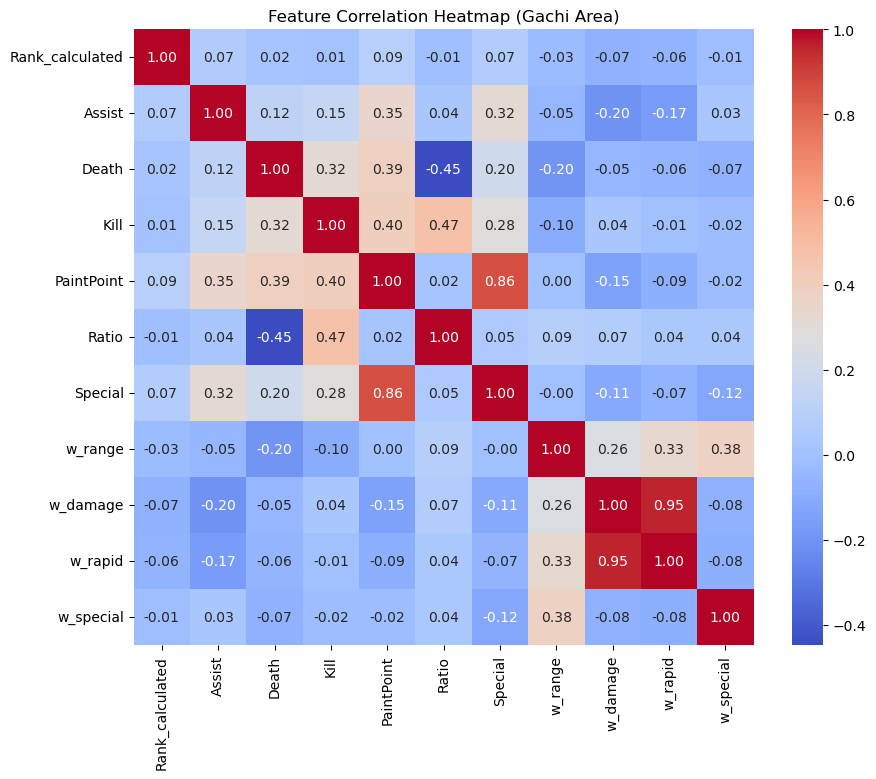

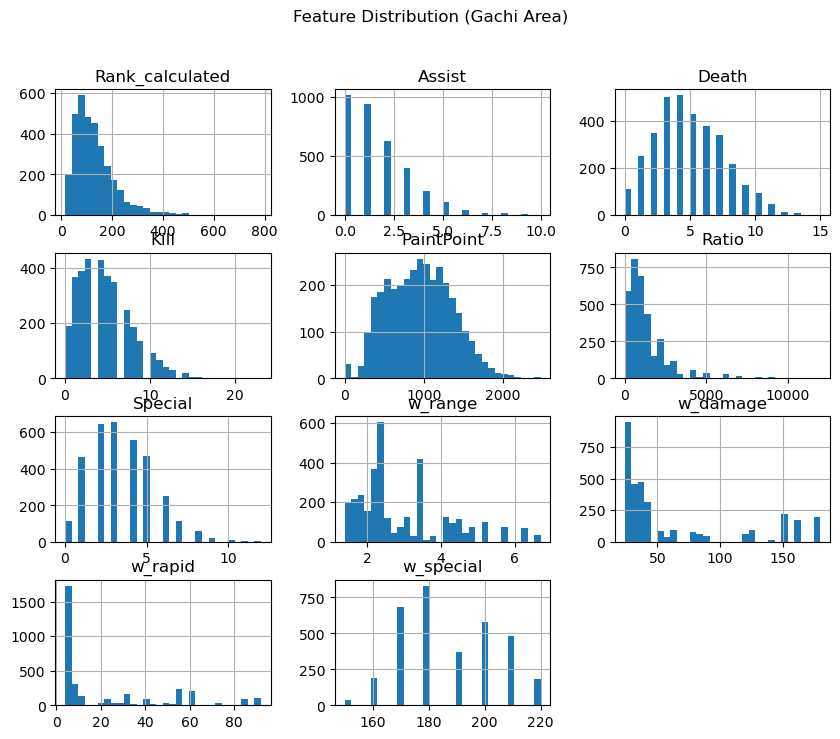

In [117]:
# 相関関係と特徴量ごとのデータ分布を確認
check_correlation_distribution(X_train, "Gachi Area")

In [118]:
# ロジスティック回帰分析を行い、モデルを評価
logistic_regression(X_train, X_test, y_train, y_test, "Gachi Area")


Accuracy for Gachi Area: 0.5344
              precision    recall  f1-score   support

           0       0.52      0.26      0.34       398
           1       0.54      0.78      0.64       444

    accuracy                           0.53       842
   macro avg       0.53      0.52      0.49       842
weighted avg       0.53      0.53      0.50       842


Feature Coefficients:
             Feature  Coefficient
6           Special     0.086019
8          w_damage     0.081711
2             Death     0.047507
10        w_special     0.040073
7           w_range    -0.021922
4        PaintPoint    -0.036937
0   Rank_calculated    -0.072784
5             Ratio    -0.073585
1            Assist    -0.081339
3              Kill    -0.101207
9           w_rapid    -0.104500


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIFを計算する関数
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF を計算して表示
X_vif = X_train.copy()  # 説明変数のデータフレーム
vif_result = calculate_vif(X_vif)

# 結果を表示
print(vif_result)

            Feature        VIF
0   Rank_calculated   3.537162
1            Assist   2.335237
2             Death  10.450437
3              Kill   7.952028
4        PaintPoint  36.787600
5             Ratio   5.083597
6           Special  18.143096
7           w_range   9.977754
8          w_damage  34.656276
9           w_rapid  24.581863
10        w_special  26.875591


### ガチホコ

In [119]:
# ガチホコのデータ分布を確認
X_train, X_test, y_train, y_test = check_distribution(gachi_hoko, "Gachi Hoko")

Train class distribution:
 1    1208
0    1113
Name: win, dtype: int64
Test class distribution:
 1    302
0    279
Name: win, dtype: int64


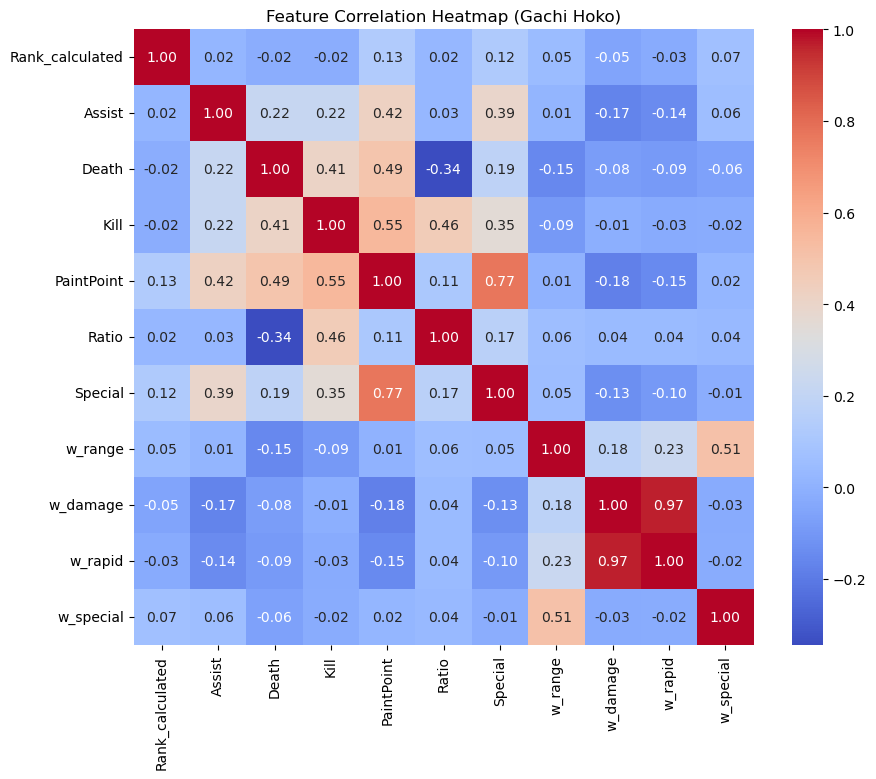

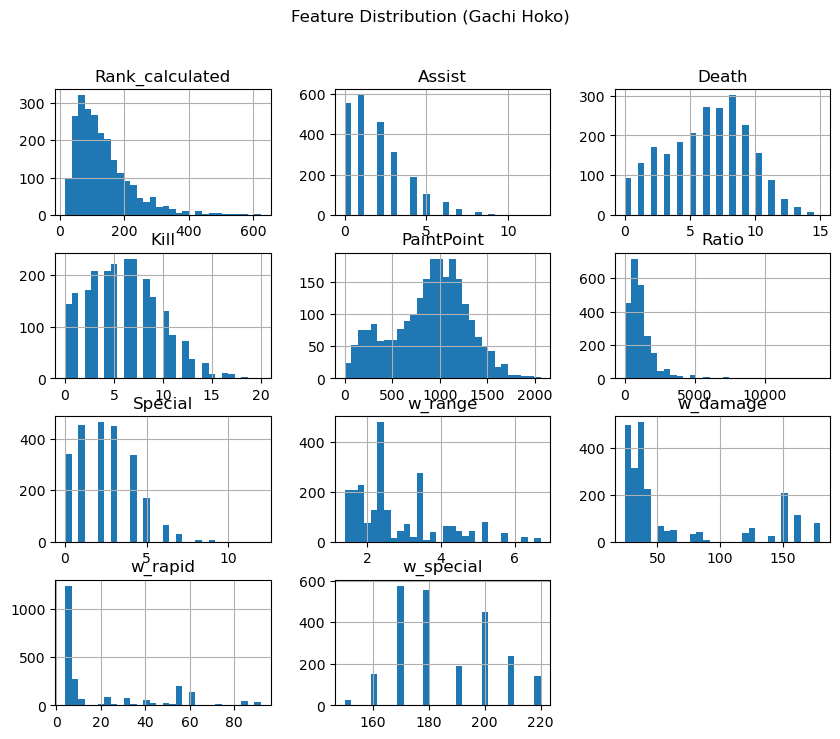

In [120]:
# 相関関係と特徴量ごとのデータ分布を確認
check_correlation_distribution(X_train, "Gachi Hoko")

In [121]:
# ロジスティック回帰分析を行い、モデルを評価
logistic_regression(X_train, X_test, y_train, y_test, "Gachi Hoko")


Accuracy for Gachi Hoko: 0.5232
              precision    recall  f1-score   support

           0       0.51      0.23      0.31       279
           1       0.53      0.80      0.64       302

    accuracy                           0.52       581
   macro avg       0.52      0.51      0.47       581
weighted avg       0.52      0.52      0.48       581


Feature Coefficients:
             Feature  Coefficient
9           w_rapid     0.110515
2             Death     0.080737
5             Ratio     0.028743
6           Special     0.024143
10        w_special    -0.013624
7           w_range    -0.022852
0   Rank_calculated    -0.024576
4        PaintPoint    -0.044626
3              Kill    -0.052553
1            Assist    -0.068348
8          w_damage    -0.146280


### ガチアサリ

In [122]:
# ガチアサリのデータ分布を確認
X_train, X_test, y_train, y_test = check_distribution(gachi_asari, "Gachi Asari")

Train class distribution:
 1    1261
0    1145
Name: win, dtype: int64
Test class distribution:
 1    316
0    286
Name: win, dtype: int64


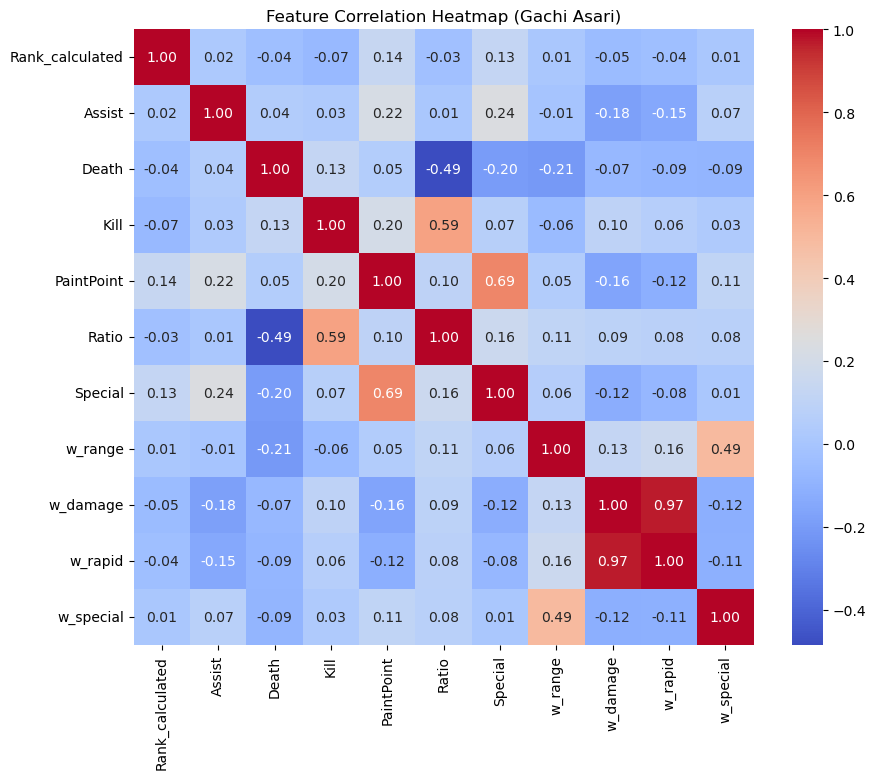

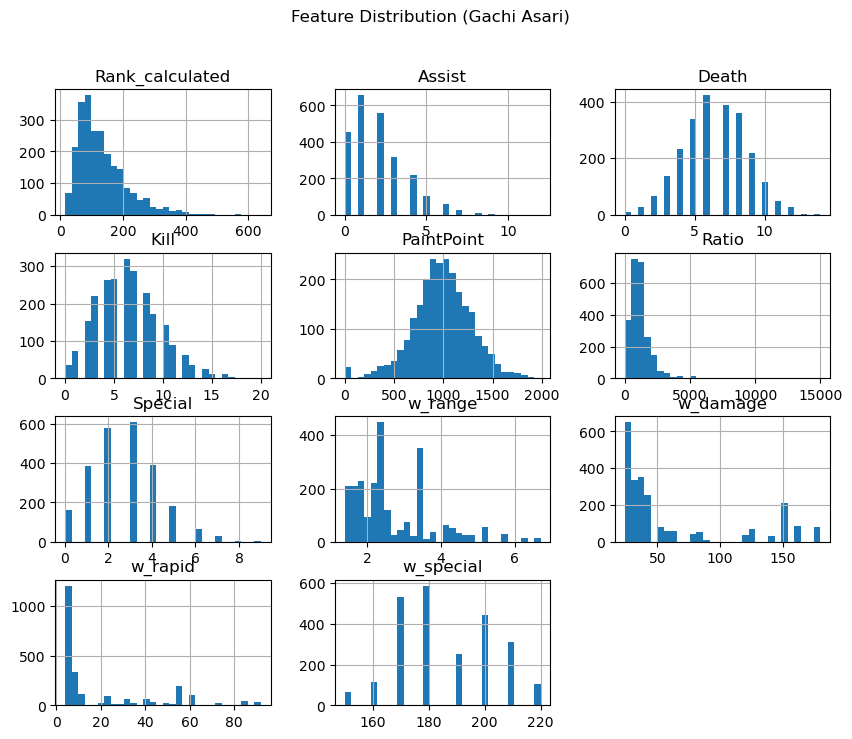

In [123]:
# 相関関係と特徴量ごとのデータ分布を確認
check_correlation_distribution(X_train, "Gachi Asari")

In [124]:
# ロジスティック回帰分析を行い、モデルを評価
logistic_regression(X_train, X_test, y_train, y_test, "Gachi Asari")


Accuracy for Gachi Asari: 0.5465
              precision    recall  f1-score   support

           0       0.53      0.36      0.43       286
           1       0.55      0.71      0.62       316

    accuracy                           0.55       602
   macro avg       0.54      0.54      0.53       602
weighted avg       0.54      0.55      0.53       602


Feature Coefficients:
             Feature  Coefficient
8          w_damage     0.211562
5             Ratio     0.101383
6           Special     0.081701
10        w_special     0.063776
2             Death     0.042467
4        PaintPoint     0.040456
0   Rank_calculated     0.034529
7           w_range    -0.028284
1            Assist    -0.141726
3              Kill    -0.163715
9           w_rapid    -0.186227
